# Nonlinear Dimensionality Reduction
    t-SNE and UMAP for Structure Discovery (Not Modeling)
    
    
##  Objective

This notebook provides a practical and conceptually rigorous treatment of nonlinear dimensionality reduction, covering:

- Why linear methods fail

- t-SNE and UMAP intuition

- Proper parameter usage

- Visualization best practices

- Pitfalls and misuse avoidance

It answers:

    How can we reveal complex structure in high-dimensional data without misleading ourselves?

##  Business Context – Why Nonlinear Methods in Finance?

Nonlinear methods are used primarily for:

- Exploratory analysis

- Segment visualization

- Cluster validation

- Pattern discovery

     
They are not modeling techniques and should not replace PCA or feature engineering.

## Imports and Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("D:/GitHub/Data-Science-Techniques/datasets/Unsupervised/synthetic_bank_customer_segmentation.csv")

df.head()

,age,annual_income,avg_monthly_spend,credit_utilization,tenure_years,num_products,risk_score
0,56,106477.0,5268.0,0.06,3.1,1,24.1
1,69,109688.0,2206.0,0.00,2.0,1,22.0
2,46,94629.0,2998.0,0.22,3.2,1,36.1
3,32,49359.0,1725.0,0.17,4.6,1,24.4
4,60,91565.0,1807.0,0.06,21.3,7,17.3


In [2]:
features = [
    "age",
    "annual_income",
    "avg_monthly_spend",
    "credit_utilization",
    "tenure_years",
    "num_products",
    "risk_score"
]

X = df[features]

# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Why Nonlinear Methods?

PCA fails when:

- Structure is curved

- Clusters overlap linearly

- Local neighborhoods matter more than global variance

- Nonlinear methods preserve local structure, not variance.

#   t-SNE (t-distributed Stochastic Neighbor Embedding)
Key Properties

- Preserves local neighborhoods

- Excellent for visualization

- Non-deterministic

- No inverse transform

##   t-SNE Implementation
### t-SNE Fit

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=2010
)

X_tsne = tsne.fit_transform(X_scaled)


C:\Users\pantu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


## t-SNE Visualization
### Scatter Plot

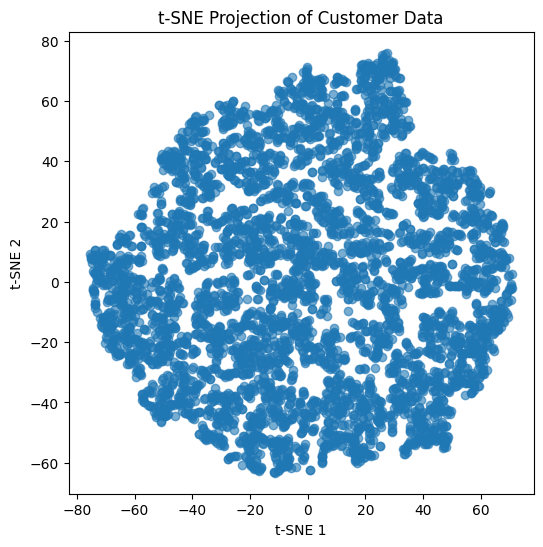

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
plt.title("t-SNE Projection of Customer Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


Distances between clusters are not meaningful

## t-SNE with Cluster Overlay
### Overlay K-Means Clusters

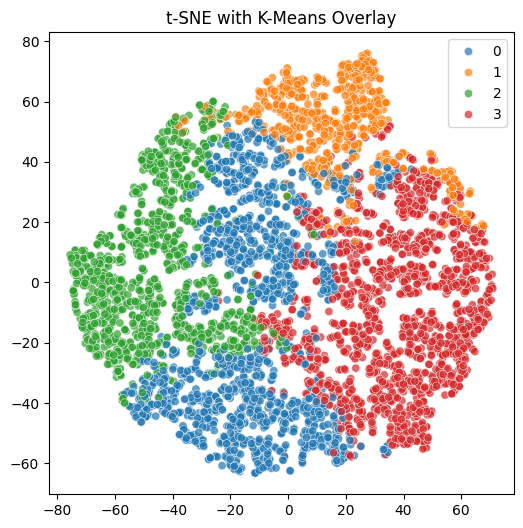

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=labels,
    palette="tab10",
    alpha=0.7
)
plt.title("t-SNE with K-Means Overlay")
plt.show()


✔ Use t-SNE to validate, not define clusters

## UMAP (Uniform Manifold Approximation)

UMAP improves on t-SNE by:

- Better global structure

- Faster performance

- Some metric preservation

- More stable embeddings

## UMAP Implementation
### UMAP Fit

In [11]:
# # Run if next fail due missing library: UMAP
# !pip install umap-learn

In [7]:
import umap

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=2010
)

X_umap = umap_model.fit_transform(X_scaled)


C:\Users\pantu\anaconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [8]:
#!pip uninstall umap
#!pip uninstall umap-learn

## UMAP Visualization
### UMAP Plot

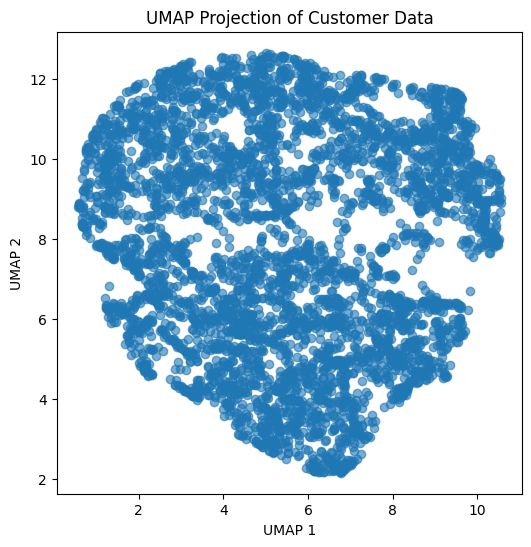

In [9]:
plt.figure(figsize=(6, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
plt.title("UMAP Projection of Customer Data")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()


## UMAP with Cluster Overlay
### Overlay Clusters

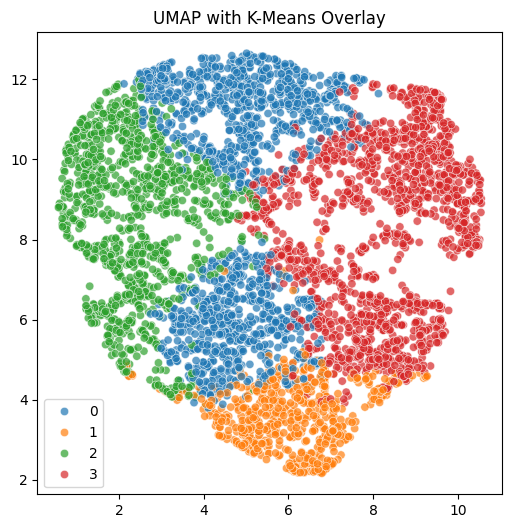

In [10]:
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x=X_umap[:, 0],
    y=X_umap[:, 1],
    hue=labels,
    palette="tab10",
    alpha=0.7
)
plt.title("UMAP with K-Means Overlay")
plt.show()


##  t-SNE vs UMAP


| Aspect           | t-SNE              | UMAP          |
| ---------------- | ------------------ | ------------- |
| Speed            | Slow               | Fast          |
| Global structure | Poor               | Better        |
| Stability        | Low                | Medium        |
| Interpretability | Visualization only | Visualization |
| Production       | NO                 | NO            |


##  When NOT to Use Nonlinear Methods

- `[NO] - ` As model input
- `[NO] - ` For feature engineering
- `[NO] - ` For explainability
- `[NO] - ` For regulatory decisions

## Common Mistakes (Avoided)

- `[NO] - ` Interpreting distances literally
- `[NO] - ` Comparing embeddings across runs
- `[NO] - ` Using default parameters blindly
- `[NO] - ` Presenting plots as proof
- `[NO] - ` Using nonlinear methods in pipelines

## Summary Table


| Method | Purpose                       |
| ------ | ----------------------------- |
| t-SNE  | Local structure visualization |
| UMAP   | Balanced visualization        |
| PCA    | Modeling & compression        |


## Key Takeaways

- Nonlinear methods are exploratory tools

- t-SNE and UMAP reveal hidden structure

- Scaling is mandatory

- Use alongside—not instead of—PCA

- Never treat embeddings as features

## Next Notebook
05_Unsupervised_Learning/

└── 02_dimensionality_reduction/

 - └── [03_dimensionality_reduction_validation.ipynb](03_dimensionality_reduction_validation.ipynb)

<br><br><br><br><br>



# Complete: [Data Science Techniques](https://github.com/lei-soares/Data-Science-Techniques)

- [00_Data_Generation_and_Simulation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/00_Data_Generation_and_Simulation)


- [01_Exploratory_Data_Analysis_(EDA)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/01_Exploratory_Data_Analysis_(EDA))


- [02_Data_Preprocessing](https://github.com/lei-soares/Data-Science-Techniques/tree/main/02_Data_Preprocessing)


- [03_Feature_Engineering](https://github.com/lei-soares/Data-Science-Techniques/tree/main/03_Feature_Engineering)


- [04_Supervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

    - [Regression Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/01_regression_models)
    
    - [Classification Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/02_classification_models)


- [05_Unsupervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/05_Unsupervised_Learning)


- [06_Model_Evaluation_and_Validation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/06_Model_Evaluation_and_Validation)


- [07_Model_Tuning_and_Optimization](https://github.com/lei-soares/Data-Science-Techniques/tree/main/07_Model_Tuning_and_Optimization)


- [08_Interpretability_and_Explainability](https://github.com/lei-soares/Data-Science-Techniques/tree/main/08_Interpretability_and_Explainability)


- [09_Pipelines_and_Workflows](https://github.com/lei-soares/Data-Science-Techniques/tree/main/09_Pipelines_and_Workflows)


- [10_Natural_Language_Processing_(NLP)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/10_Natural_Language_Processing_(NLP))


- [11_Time_Series](https://github.com/lei-soares/Data-Science-Techniques/tree/main/11_Time_Series)


- [12_Anomaly_and_Fraud_Detection](https://github.com/lei-soares/Data-Science-Techniques/tree/main/12_Anomaly_and_Fraud_Detection)


- [13_Imbalanced_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/13_Imbalanced_Learning)


- [14_Deployment_and_Production_Concepts](https://github.com/lei-soares/Data-Science-Techniques/tree/main/14_Deployment_and_Production_Concepts)


- [15_Business_and_Experimental_Design](https://github.com/lei-soares/Data-Science-Techniques/tree/main/15_Business_and_Experimental_Design)




<br><br><br><br><br>

[Panfugo Dados](www.pantufodados.com)


[Pantufo Dados - YouTube Channel](https://www.youtube.com/@pantufodados)